# Face-Recognition Project

## Import necessary libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

## Read csv

In [5]:
recognition = pd.read_csv('recognition.csv')

## Check out .info() and .head()

In [6]:
recognition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 5941 entries, 0 to 5940
dtypes: float64(5940), int64(1)
memory usage: 226.6 MB


In [7]:
recognition.head()

,0,1,2,3,4,5,6,7,8,9,...,5931,5932,5933,5934,5935,5936,5937,5938,5939,5940
0,0.198046,0.230344,0.000000,0.0,0.031943,0.0,0.0,0.0,0.0,0.300264,...,0.0,0.000000,0.091388,0.000000,0.059474,0.0,0.000000,0.066494,0.000000,0
1,0.118230,0.214569,0.000000,0.0,0.024891,0.0,0.0,0.0,0.0,0.367136,...,0.0,0.038483,0.000000,0.073522,0.060235,0.0,0.000000,0.000000,0.000000,0
2,0.082046,0.000000,0.073955,0.0,0.030767,0.0,0.0,0.0,0.0,0.348695,...,0.0,0.000000,0.220453,0.136205,0.044520,0.0,0.000000,0.000000,0.000000,0
3,0.171889,0.000000,0.352686,0.0,0.292211,0.0,0.0,0.0,0.0,0.275022,...,0.0,0.000000,0.000000,0.000000,0.018883,0.0,0.080115,0.064805,0.000000,0
4,0.287758,0.430451,0.000000,0.0,0.255785,0.0,0.0,0.0,0.0,0.191839,...,0.0,0.000000,0.000000,0.000000,0.022898,0.0,0.000000,0.000000,0.173252,0


## Rename the last column with 'Target Class' tag
This column contains the label for each class

In [8]:
recognition.columns = [*recognition.columns[:-1], 'Target Class']

In [9]:
recognition

,0,1,2,3,4,5,6,7,8,9,...,5931,5932,5933,5934,5935,5936,5937,5938,5939,Target Class
0,0.198046,0.230344,0.000000,0.0,0.031943,0.0,0.0,0.0,0.0,0.300264,...,0.0,0.000000,0.091388,0.000000,0.059474,0.0,0.000000,0.066494,0.000000,0
1,0.118230,0.214569,0.000000,0.0,0.024891,0.0,0.0,0.0,0.0,0.367136,...,0.0,0.038483,0.000000,0.073522,0.060235,0.0,0.000000,0.000000,0.000000,0
2,0.082046,0.000000,0.073955,0.0,0.030767,0.0,0.0,0.0,0.0,0.348695,...,0.0,0.000000,0.220453,0.136205,0.044520,0.0,0.000000,0.000000,0.000000,0
3,0.171889,0.000000,0.352686,0.0,0.292211,0.0,0.0,0.0,0.0,0.275022,...,0.0,0.000000,0.000000,0.000000,0.018883,0.0,0.080115,0.064805,0.000000,0
4,0.287758,0.430451,0.000000,0.0,0.255785,0.0,0.0,0.0,0.0,0.191839,...,0.0,0.000000,0.000000,0.000000,0.022898,0.0,0.000000,0.000000,0.173252,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.527076,0.000000,0.000000,0.0,0.003263,0.0,0.0,0.0,0.0,0.459052,...,0.0,0.000000,0.000000,0.000000,0.019899,0.0,0.000000,0.000000,0.418726,9
4996,0.486434,0.000000,0.000000,0.0,0.022391,0.0,0.0,0.0,0.0,0.516188,...,0.0,0.000000,0.000000,0.000000,0.053880,0.0,0.000000,0.000000,0.473701,9
4997,0.681737,0.000000,0.000000,0.0,0.034823,0.0,0.0,0.0,0.0,0.177984,...,0.0,0.000000,0.000000,0.000000,0.093822,0.0,0.000000,0.000000,0.588921,9
4998,0.525413,0.000000,0.000000,0.0,0.003201,0.0,0.0,0.0,0.0,0.476297,...,0.0,0.000000,0.000000,0.000000,0.035919,0.0,0.000000,0.129507,0.155014,9


In [10]:
recognition['Target Class'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

## Standardize Data for more consistent classification

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [12]:
scaler.fit(recognition.drop('Target Class', axis=1))

StandardScaler()

In [13]:
scaled_data = scaler.transform(recognition.drop('Target Class',axis=1))

In [12]:
df_feat = pd.DataFrame(scaled_data,columns=recognition.columns[:-1])
df_feat

,0,1,2,3,4,5,6,7,8,9,...,5930,5931,5932,5933,5934,5935,5936,5937,5938,5939
0,-1.030861,1.670668,-0.207238,-0.114813,-0.558022,-0.052961,-0.050694,-0.091699,-0.355369,-0.581955,...,-0.451750,-0.575402,-0.354753,1.004828,-0.351040,-0.575324,-0.28748,-0.344119,0.596000,-0.575492
1,-1.371266,1.528972,-0.207238,-0.114813,-0.634160,-0.052961,-0.050694,-0.091699,-0.355369,-0.259884,...,-0.451750,-0.575402,0.167268,-0.341376,0.602720,-0.569466,-0.28748,-0.344119,-0.440352,-0.575492
2,-1.525588,-0.398307,0.982900,-0.114813,-0.570715,-0.052961,-0.050694,-0.091699,-0.355369,-0.348699,...,-0.451750,-0.575402,-0.354753,2.906054,1.415885,-0.690414,-0.28748,-0.344119,-0.440352,-0.575492
3,-1.142420,-0.398307,5.468425,-0.114813,2.251872,-0.052961,-0.050694,-0.091699,-0.355369,-0.703526,...,-0.451750,-0.575402,-0.354753,-0.341376,-0.351040,-0.887718,-0.28748,1.564069,0.569678,-0.575492
4,-0.648252,3.468056,-0.207238,-0.114813,1.858614,-0.052961,-0.050694,-0.091699,-0.355369,-1.104152,...,-0.451750,-0.575402,-0.354753,-0.341376,-0.351040,-0.856823,-0.28748,-0.344119,-0.440352,0.768411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.372408,-0.398307,-0.207238,-0.114813,-0.867651,-0.052961,-0.050694,-0.091699,-0.355369,0.182800,...,-0.451750,-0.575402,-0.354753,-0.341376,-0.351040,-0.879901,-0.28748,-0.344119,-0.440352,2.672533
4996,0.199074,-0.398307,-0.207238,-0.114813,-0.661150,-0.052961,-0.050694,-0.091699,-0.355369,0.457979,...,-0.451750,-0.575402,-0.354753,-0.341376,-0.351040,-0.618374,-0.28748,-0.344119,-0.440352,3.098976
4997,1.032018,-0.398307,-0.207238,-0.114813,-0.526929,-0.052961,-0.050694,-0.091699,-0.355369,-1.170881,...,0.876375,-0.575402,-0.354753,-0.341376,-0.351040,-0.310980,-0.28748,-0.344119,-0.440352,3.992727
4998,0.365316,-0.398307,-0.207238,-0.114813,-0.868323,-0.052961,-0.050694,-0.091699,-0.355369,0.265855,...,-0.451750,-0.575402,-0.354753,-0.341376,-0.351040,-0.756610,-0.28748,-0.344119,1.578097,0.626941


## PCA Decomposition
PCA is used to find the first two principal components, and visualize the data in this new, two-dimensional space, with a single scatter-plot.

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [14]:
pca.fit(scaled_data)

PCA(n_components=2)

In [15]:
x_pca = pca.transform(scaled_data)

In [16]:
scaled_data.shape

(5000, 5940)

In [17]:
x_pca.shape

(5000, 2)

## Scatter Plot 2-D
In this scatter plot all the classes are compared between each other

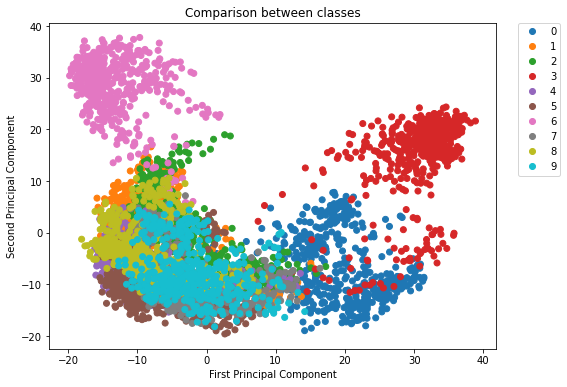

In [20]:
plt.figure(figsize=(8,6))
scatter = plt.scatter(x_pca[:,0],x_pca[:,1],c=recognition['Target Class'], cmap='tab10')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Comparison between classes')
plt.legend(handles=scatter.legend_elements()[0], labels=[0,1,2,3,4,5,6,7,8,9], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## PCA Decomposition in 66 components
PCA now is used to find the 66 principal components

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
pca = PCA(n_components=66)

In [15]:
pca.fit(scaled_data)

PCA(n_components=594)

In [16]:
x_pca = pca.transform(scaled_data)

## Train Test Split

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X=x_pca
y=recognition['Target Class'].values

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Try using KNeighborsClassifier

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
knn_error_rate = []

# Will take some time
for i in range(1,100):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    knn_error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'KNN Error Rate')

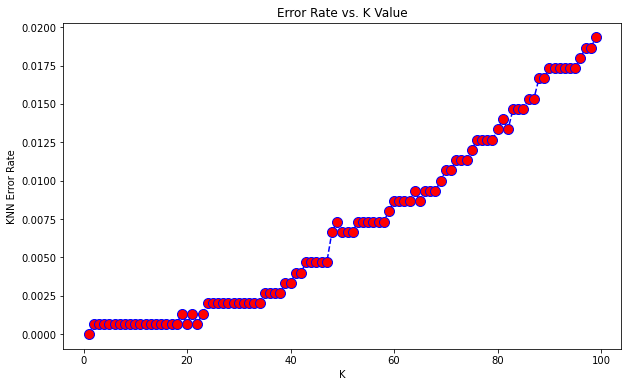

In [22]:
plt.figure(figsize=(10,6))
plt.plot(range(1,100),knn_error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('KNN Error Rate')

## Try using SVM with Linear Kernel

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC,LinearSVC

In [26]:
param_grid = {'estimator__C':[1e-9,1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,10,100,1000,10000,100000,1e6,1e7,1e8,1e9]}

In [27]:
grid = GridSearchCV(OneVsRestClassifier(LinearSVC(max_iter=100000)),param_grid,verbose=3)

In [28]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 19 candidates, totalling 95 fits
[CV 1/5] END ................estimator__C=1e-09;, score=0.991 total time=   0.2s
[CV 2/5] END ................estimator__C=1e-09;, score=0.991 total time=   0.2s
[CV 3/5] END ................estimator__C=1e-09;, score=0.997 total time=   0.2s
[CV 4/5] END ................estimator__C=1e-09;, score=0.997 total time=   0.2s
[CV 5/5] END ................estimator__C=1e-09;, score=0.989 total time=   0.2s
[CV 1/5] END ................estimator__C=1e-08;, score=0.993 total time=   0.2s
[CV 2/5] END ................estimator__C=1e-08;, score=0.991 total time=   0.2s
[CV 3/5] END ................estimator__C=1e-08;, score=0.997 total time=   0.2s
[CV 4/5] END ................estimator__C=1e-08;, score=0.997 total time=   0.2s
[CV 5/5] END ................estimator__C=1e-08;, score=0.989 total time=   0.2s
[CV 1/5] END ................estimator__C=1e-07;, score=0.993 total time=   0.3s
[CV 2/5] END ................estimator__C=1e-07;

GridSearchCV(estimator=OneVsRestClassifier(estimator=LinearSVC(max_iter=100000)),
             param_grid={'estimator__C': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05,
                                          0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                          1000, 10000, 100000, 1000000.0,
                                          10000000.0, 100000000.0,
                                          1000000000.0]},
             verbose=3)

In [29]:
grid.best_params_

{'estimator__C': 1e-05}

In [30]:
grid.best_score_

0.9997142857142857

## Try using SVM with RBF Kernel

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC,LinearSVC

In [32]:
param_grid_rbf = {'estimator__C':[1e-4,1e-3,1e-2,1e-1,1,10,100,1000,10000],
                  'estimator__gamma':[0.001,0.01,0.1,1,10,1],
                  'estimator__kernel':['rbf']
                 }

In [33]:
grid_rbf = GridSearchCV(OneVsRestClassifier(SVC(max_iter=100000)),param_grid_rbf,verbose=3)

In [ ]:
grid_rbf.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV 1/5] END estimator__C=0.0001, estimator__gamma=0.001, estimator__kernel=rbf;, score=0.997 total time=   4.0s
[CV 2/5] END estimator__C=0.0001, estimator__gamma=0.001, estimator__kernel=rbf;, score=0.983 total time=   4.5s
[CV 3/5] END estimator__C=0.0001, estimator__gamma=0.001, estimator__kernel=rbf;, score=0.987 total time=   4.1s
[CV 4/5] END estimator__C=0.0001, estimator__gamma=0.001, estimator__kernel=rbf;, score=0.984 total time=   3.9s
[CV 5/5] END estimator__C=0.0001, estimator__gamma=0.001, estimator__kernel=rbf;, score=0.969 total time=   3.9s
[CV 1/5] END estimator__C=0.0001, estimator__gamma=0.01, estimator__kernel=rbf;, score=0.436 total time=   3.9s
[CV 2/5] END estimator__C=0.0001, estimator__gamma=0.01, estimator__kernel=rbf;, score=0.440 total time=   4.0s
[CV 3/5] END estimator__C=0.0001, estimator__gamma=0.01, estimator__kernel=rbf;, score=0.430 total time=   3.7s
[CV 4/5] END estimator__C=0.0001, est

[CV 5/5] END estimator__C=0.01, estimator__gamma=0.1, estimator__kernel=rbf;, score=0.106 total time=  27.0s
[CV 1/5] END estimator__C=0.01, estimator__gamma=1, estimator__kernel=rbf;, score=0.106 total time=  25.6s
[CV 2/5] END estimator__C=0.01, estimator__gamma=1, estimator__kernel=rbf;, score=0.104 total time=  27.2s
[CV 3/5] END estimator__C=0.01, estimator__gamma=1, estimator__kernel=rbf;, score=0.104 total time=  29.6s
[CV 4/5] END estimator__C=0.01, estimator__gamma=1, estimator__kernel=rbf;, score=0.106 total time=  28.9s
[CV 5/5] END estimator__C=0.01, estimator__gamma=1, estimator__kernel=rbf;, score=0.106 total time=  29.6s
[CV 1/5] END estimator__C=0.01, estimator__gamma=10, estimator__kernel=rbf;, score=0.106 total time=  35.5s
[CV 2/5] END estimator__C=0.01, estimator__gamma=10, estimator__kernel=rbf;, score=0.104 total time=  29.6s
[CV 3/5] END estimator__C=0.01, estimator__gamma=10, estimator__kernel=rbf;, score=0.104 total time=  36.7s
[CV 4/5] END estimator__C=0.01, 

[CV 2/5] END estimator__C=10, estimator__gamma=0.001, estimator__kernel=rbf;, score=0.951 total time=  39.5s
[CV 3/5] END estimator__C=10, estimator__gamma=0.001, estimator__kernel=rbf;, score=0.929 total time=  38.3s
[CV 4/5] END estimator__C=10, estimator__gamma=0.001, estimator__kernel=rbf;, score=0.951 total time=  37.7s
[CV 5/5] END estimator__C=10, estimator__gamma=0.001, estimator__kernel=rbf;, score=0.920 total time=  38.6s
[CV 1/5] END estimator__C=10, estimator__gamma=0.01, estimator__kernel=rbf;, score=0.106 total time=  39.2s
[CV 2/5] END estimator__C=10, estimator__gamma=0.01, estimator__kernel=rbf;, score=0.104 total time=  39.1s
[CV 3/5] END estimator__C=10, estimator__gamma=0.01, estimator__kernel=rbf;, score=0.104 total time=  39.5s
[CV 4/5] END estimator__C=10, estimator__gamma=0.01, estimator__kernel=rbf;, score=0.106 total time=  42.7s
[CV 5/5] END estimator__C=10, estimator__gamma=0.01, estimator__kernel=rbf;, score=0.106 total time=  34.1s
[CV 1/5] END estimator__

In [69]:
grid_rbf.best_params_

{'estimator__C': 0.1, 'estimator__gamma': 0.001, 'estimator__kernel': 'rbf'}

In [71]:
grid_rbf.best_score_

1.0

## Train the Support Vector Classifier selected

In [29]:
svm_rbf = OneVsRestClassifier(SVC(C=0.1, gamma=0.001, random_state=42))

In [30]:
svm_rbf.fit(X_train,y_train)

OneVsRestClassifier(estimator=SVC(C=0.1, gamma=0.001, random_state=42))

## Predictions and Evaluations (Linear Kernel)

In [75]:
predictions = svm.predict(X_test)

In [77]:
from sklearn.metrics import classification_report,confusion_matrix

In [79]:
print(confusion_matrix(y_test,predictions))

[[162   0   0   1   0   0   1   0   0   0]
 [  0 152   0   0   0   0   0   0   0   0]
 [  0   0 155   0   0   0   0   0   0   0]
 [  0   0   0 154   0   0   0   0   0   0]
 [  0   0   0   0 143   0   0   0   0   0]
 [  0   0   0   0   0 141   0   0   0   0]
 [  0   0   0   0   0   0 143   0   0   0]
 [  0   0   0   0   0   0   0 158   0   0]
 [  0   0   0   0   0   0   0   0 132   0]
 [  0   0   0   0   0   0   0   0   0 158]]


In [80]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       164
           1       1.00      1.00      1.00       152
           2       1.00      1.00      1.00       155
           3       0.99      1.00      1.00       154
           4       1.00      1.00      1.00       143
           5       1.00      1.00      1.00       141
           6       0.99      1.00      1.00       143
           7       1.00      1.00      1.00       158
           8       1.00      1.00      1.00       132
           9       1.00      1.00      1.00       158

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500



## Train the Support Vector Classifier selected

In [55]:
svm = OneVsRestClassifier(LinearSVC(C=0.1, random_state=42))

In [56]:
svm.fit(X_train,y_train)

C:\Users\fabri\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\fabri\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\fabri\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\fabri\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\fabri\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\fabri\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number 

OneVsRestClassifier(estimator=LinearSVC(C=0.1, random_state=42))

## Predictions and Evaluations

In [31]:
predictions = svm_rbf.predict(X_test)

In [32]:
from sklearn.metrics import classification_report,confusion_matrix

In [33]:
print(confusion_matrix(y_test,predictions))

[[164   0   0   0   0   0   0   0   0   0]
 [  0 152   0   0   0   0   0   0   0   0]
 [  0   0 155   0   0   0   0   0   0   0]
 [  0   0   0 154   0   0   0   0   0   0]
 [  0   0   0   0 143   0   0   0   0   0]
 [  0   0   0   0   0 141   0   0   0   0]
 [  0   0   0   0   0   0 143   0   0   0]
 [  0   0   0   0   0   0   0 158   0   0]
 [  0   0   0   0   0   0   0   0 132   0]
 [  0   0   0   0   0   0   0   0   0 158]]


In [34]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       164
           1       1.00      1.00      1.00       152
           2       1.00      1.00      1.00       155
           3       1.00      1.00      1.00       154
           4       1.00      1.00      1.00       143
           5       1.00      1.00      1.00       141
           6       1.00      1.00      1.00       143
           7       1.00      1.00      1.00       158
           8       1.00      1.00      1.00       132
           9       1.00      1.00      1.00       158

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500



## Save Model

In [36]:
import joblib

In [37]:
joblib.dump(svm, 'face_recognition_rbf.xml')

['face_recognition_rbf.xml']